# Laboratorio 1

En este trabajo se pretende analizar los diferentes tipos de incendios forestales y distintos tipos de superficies incendiadas en Argentina, y cómo es su distribución en las distintas provincias en los últimos años. 


## Descripción de los dataset

Los sets de datos utilizados fueron elaborados por el Ministerio de Ambiente y Desarrollo Sustentable (se puede encontrar en este [link](http://datos.ambiente.gob.ar/dataset/12f60bea-3225-4375-935c-1fb9ebe3ef57), en el portal de datos abiertos del Ministerio de Modernización). En primera instancia, para poder entender los datos e interpretarlos hay que tener en cuenta lo que se entiende por incendio forestal y los diferentes tipos de incendios. Como podemos ver [aquí](http://ambiente.gob.ar/wp-content/uploads/estad%C3%ADstica_incendios_forestales_2016.pdf#page=8), se entiende por *incendio forestal* a cualquier fuego que se extiende sin control en terreno forestal afectando vegetación que no estaba destinada a arder.

Los diferentes tipos de incendio que se van a considerar en uno de los dataset se caracterizan de la siguiente manera:
   
- **Intencional:** fuego provocado para obtener un beneficio. Ejemplo: quema de bosques para favorecer el desarrollo de pasturas.
- **Negligencia:** fuego provocado por descuido. Ejemplo: fogón mal apagado.
- **Natural:** fuego provocado por las sequías, altas temperaturas, tormentas eléctricas.

En el caso de no conocer la causa se lo considera como de tipo **desconocido**

En este *dataset* se encuentra la información indexada por año (desde 1993 hasta el 2016) y por provincia, y para cada año y provincia podemos encontrar la cantidad total de incendios y la cantidad de incendios por tipo.  


En cuanto al segundo dataset encontramos información de las hectareas afectadas segun el tipo de vegetación, entre ellos encontramos:

- **Bosque:** es una agrupación de plantas en la que predominan los árboles u otra vegetación leñosa y cuya cobertura es de al
  menos el 20% de la superficie.
- **Bosque nativo:** es un bosque que ha evolucionado a partir de organismos que ya estaban en el lugar (predominio de especies autóctonas) y cuya cobertura es de al menos el 20% de la superficie y la altura de los árboles a la madurez es > o = a 4 metros.
- **Bosque cultivado:** es una plantación forestal obtenida mediante la implantación de árboles o estacas.
- **Pastizal:** terreno de pastos, en el que el combustible principal es hierba, sin importar altura.
- **Arbustal o matorral:** terreno con plantas que se diferencian de las hierbas por sus tallos persistentes y leñosos, y de los bosques por su
  poca altura (hasta 4 metros) y su tendencia a ramificarse desde la base.
 
En el caso de no conocer el tipo de vegetación afectada por el incendio se lo considera como **sin_determinar**

In [0]:
%matplotlib inline
import sys
import importlib
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = 10, 8
#stylingm 
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")


In [2]:
data_cant = pd.read_csv('http://datos.ambiente.gob.ar/dataset/12f60bea-3225-4375-935c-1fb9ebe3ef57/resource/93c2f293-9698-4457-92cf-e07856d8edb2/download/incendios-cantidad-causas-provincia.csv', 
                   sep=';',encoding = 'latin-1')
display(data_cant.head(4))

data_sup = pd.read_csv('http://datos.ambiente.gob.ar/dataset/12f60bea-3225-4375-935c-1fb9ebe3ef57/resource/c7b70f96-5562-4673-9b61-6ead123a99f7/download/superficie-incendiada-provincias-tipo-de-vegetacion.csv',                    
                  sep=';',encoding = 'latin-1')
display(data_sup.head(4))


,incendio_anio,incendio_provincia,incendio_total_numero,incendio_negligencia_numero,incendio_intencional_numero,incendio_natural_numero,incendio_desconocida_numero
0,1993,Buenos Aires,0,0,0,0,0
1,1993,Catamarca,0,0,0,0,0
2,1993,Chaco,0,0,0,0,0
3,1993,Chubut,21,18,0,0,3


,superficie_afectada_por_incendios_anio,superficie_afectada_por_incendios_provincia,superficie_afectada_por_incendios_total_hectareas,superficie_afectada_por_incendios_bosque_nativo_hectareas,superficie_afectada_por_incendios_bosque_cultivado_hectareas,superficie_afectada_por_incendios_arbustal_hectareas,superficie_afectada_por_incendios_pastizal_hectareas,superficie_afectada_por_incendios_sin_determinar_hectareas
0,1993,Buenos Aires,0,0,0,0,0,0
1,1993,Catamarca,0,0,0,0,0,0
2,1993,Chaco,0,0,0,0,0,0
3,1993,Chubut,150,10,6,0,133,0


In [3]:
data_cant = data_cant.rename(columns={'incendio_anio': 'anio', 
                     'incendio_provincia': 'provincia', 
                     'incendio_total_numero': 'total', 
                     'incendio_negligencia_numero': 'negligencia', 
                     'incendio_intencional_numero': 'intencional', 
                     'incendio_natural_numero': 'natural', 
                     'incendio_desconocida_numero': 'desconocida'})


data_sup = data_sup.rename(columns={'superficie_afectada_por_incendios_anio':'anio', 
                     'superficie_afectada_por_incendios_provincia': 'provincia', 
                     'superficie_afectada_por_incendios_total_hectareas': 'sup_total', 
                     'superficie_afectada_por_incendios_bosque_nativo_hectareas': 'sup_bosque_nativo', 
                     'superficie_afectada_por_incendios_bosque_cultivado_hectareas': 'sup_bosque_cultivado', 
                     'superficie_afectada_por_incendios_arbustal_hectareas': 'sup_arbustal', 
                     'superficie_afectada_por_incendios_pastizal_hectareas': 'sup_pastizal',
                             'superficie_afectada_por_incendios_sin_determinar_hectareas':'sup_sin_determinar'})

data = pd.concat([data_cant.set_index(['anio', 'provincia']), data_sup.set_index(['anio', 'provincia'])], axis=1)
data.head(4)

total  negligencia  intencional  natural  desconocida  \
anio provincia                                                             
1993 Buenos Aires      0            0            0        0            0   
     Catamarca         0            0            0        0            0   
     Chaco             0            0            0        0            0   
     Chubut           21           18            0        0            3   

                   sup_total  sup_bosque_nativo  sup_bosque_cultivado  \
anio provincia                                                          
1993 Buenos Aires          0                  0                     0   
     Catamarca             0                  0                     0   
     Chaco                 0                  0                     0   
     Chubut              150                 10                     6   

                   sup_arbustal  sup_pastizal  sup_sin_determinar  
anio provincia                                                     
1993 Buenos Aires             0             0                   0  
     Catamarca                0             0                   0  
     Chaco                    0             0                   0  
     Chubut                   0           133                   0

La primera observación importante sobre estos sets de datos es que son datos ya procesados. Se puede ver que en vez de tener un registro de los incendios y superficies con su descripción, se tiene la suma de los incendios por categorías para cada año en cada provincia en el caso del primer data set, en el segundo encontramos la suma de las hectareas afectadas por tipo de vegetación para cada año en cada provincia.

### Valores faltantes

De la observación anterior, se puede notar que no hay valores faltantes, sino muchos valores iguales a 0 en situaciones en las que no se habrían registrado incendios forestales de algun tipo o superficie incendiada de algun tipo de vegetación. Al ya estar procesados los datos, la decisión de qué hacer con los valores faltantes ya fue tomada, por lo que no se puede concluir mucho al respecto. 

In [4]:
display(data.notnull().all().to_frame())

,0
total,True
negligencia,True
intencional,True
natural,True
desconocida,True
sup_total,True
sup_bosque_nativo,True
sup_bosque_cultivado,True
sup_arbustal,True
sup_pastizal,True


El mismo análisis se puede hacer sobre los *outliers*, probablemente ya se hayan detectado y se haya tomado una decisión a la hora de incluirlos en la suma por año y provincia.


## Objetivo

El objetivo principal va a ser intentar relacionar las causas de los incendios forestales buscar alguna relacion con la cantidad de hectareas incendiadas en  cada provincia, ver como fue su evolución en el tiempo, que aporte hacen a la cantidad total de incendios y como se distribuyen en las provincias de Argentina. En ese sentido se pretende analizar como fue la distribución de los incendios forestales en cada provincia y si se puede observar que la distribución por causa es similar.

Iniciamos un estudio en el comportamiento de cada causa de incendio a lo largo de los años, sin hacer distinción en provincia.

In [18]:
df_anio = data.groupby('anio', as_index = True).sum()
display(df_anio.head(3))
display(df_anio.describe())


,total,negligencia,intencional,natural,desconocida,sup_total,sup_bosque_nativo,sup_bosque_cultivado,sup_arbustal,sup_pastizal,sup_sin_determinar
anio,,,,,,,,,,,
1993,538,77,4,0,457,1796824,1281538,1210,0,514075,0
1994,852,577,15,6,254,1011626,406725,507,0,124931,479463
1995,4145,3368,272,100,405,730946,363224,7693,0,360029,0


,total,negligencia,intencional,natural,desconocida,sup_total,sup_bosque_nativo,sup_bosque_cultivado,sup_arbustal,sup_pastizal,sup_sin_determinar
count,24.000000,24.000000,24.000000,24.000000,24.000000,2.400000e+01,2.400000e+01,24.000000,2.400000e+01,2.400000e+01,24.000000
mean,8407.041667,2302.583333,1744.500000,431.750000,3928.208333,1.089149e+06,3.247846e+05,10281.375000,3.649618e+05,3.689923e+05,20131.583333
std,4286.004276,1352.015691,880.166338,316.204976,2663.696940,1.102459e+06,3.721331e+05,7029.718702,6.389684e+05,2.456569e+05,97838.604512
min,538.000000,77.000000,4.000000,0.000000,254.000000,1.970580e+05,3.044900e+04,507.000000,0.000000e+00,1.050720e+05,0.000000
25%,5933.500000,1062.000000,1270.000000,163.750000,2013.500000,4.395558e+05,8.996675e+04,3689.750000,3.019225e+04,1.891058e+05,0.000000
50%,7671.500000,2371.500000,1829.500000,361.500000,3609.000000,7.336435e+05,1.544060e+05,9863.000000,1.506015e+05,3.434320e+05,0.000000
75%,10673.000000,3484.500000,2256.750000,736.750000,5621.750000,1.019579e+06,3.740992e+05,16285.500000,3.030752e+05,4.333148e+05,18.000000
max,17682.000000,4395.000000,3447.000000,931.000000,9880.000000,4.692034e+06,1.281538e+06,20313.000000,2.851605e+06,1.198925e+06,479463.000000


En los 24 años de registros de incendios se puede remarcar una media de al rededor de 8400 incendios forestales en todo el pais, con un desvío de aproximadamente el 50% de la media, lo que indica mucha variación año a año (aunque hay que remarcar que esto pueda deberse a la falta de registros en algunos años y no al fenómeno en sí). Se puede notar que la causa de incendio que más aportó en las 24 provincias es de origen desconocido,  lo que imposibilita sacar conclusiones importantes.

Sin embargo este resultado puede estar viciado puesto que se está ponderando a todas las provincias por igual. Al realizar esto, puede suceder que  la provincia con mayor registro de datos se caracterice por tener registros de incendios desconocidos, y que tenga significativamente más registros que el resto (como se va a ver más adelante que sucede con la provincia de Buenos Aires).

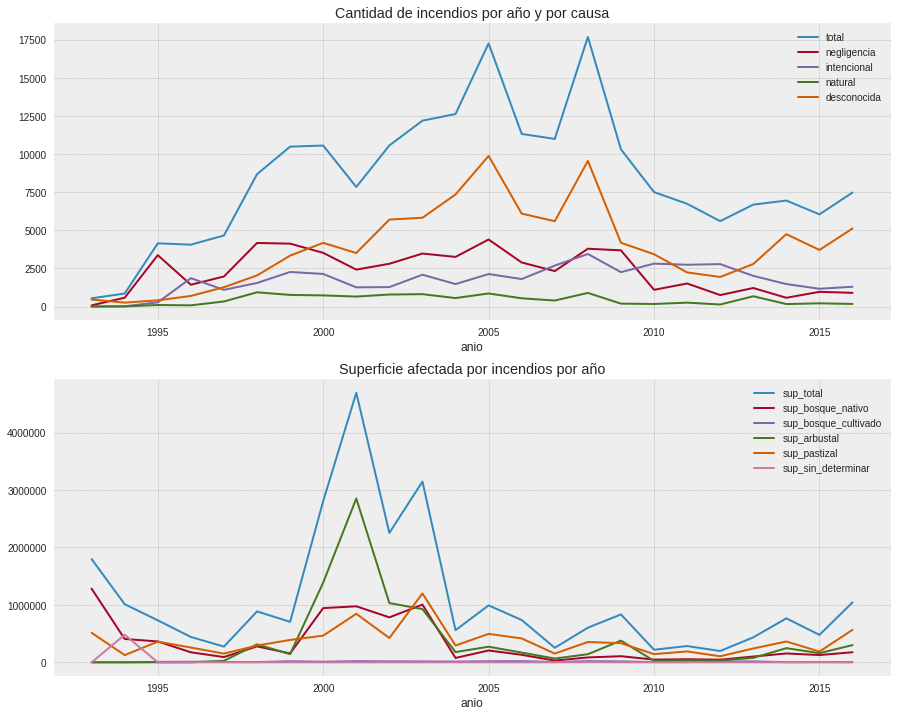

In [19]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.set_title('Cantidad de incendios por año y por causa')
df_anio.plot(y=['total', 'negligencia', 'intencional', 'natural', 'desconocida'], ax = ax1,
        kind='line')

ax2.set_title('Superficie afectada por incendios por año')
df_anio.plot(y=['sup_total', 'sup_bosque_nativo', 'sup_bosque_cultivado', 'sup_arbustal', 'sup_pastizal','sup_sin_determinar'],ax = ax2,
        kind='line')
plt.show()



En los cuadrantes se puede ver las distribuciones de la cantidad total de incendios forestales por año y por causa, y también las distribuciones de las superficies afectadas por incendios segun el tipo de vegetación. 

Se puede observar como los incendios de causa desconocida (en naranja) son los que más aportan a la cantidad total, particularmente como hay dos picos de incendios de causa desconocida en el 2005 y en el 2008. Y cómo a partir de este año la cantidad total de incendios disminuye.

Por otro lado a primera vista no hay una correlacion entre el numero total de incedios por año con el numero total de superficie incendiada por año. Entonces los dos picos que observamos en  el año 2002 y en el año 2003 en la distribucion total de superficie incediada a lo largo de los 24 años son atribuidos el primer pico a la provincia de la Pampa tal que registra un número total de 985.783 Hectareas, mientras que en el pico de el año 2003 la contribución  proviene principalemente de las provincias Pampa, Mendoza y Río Negro


Una vez realizado este análisis, se va a considerar ahora los registros agrupados por provincia:

In [7]:
df_provincia = data.groupby('provincia', as_index = True).sum()
display(df_provincia.head(3))
display(df_provincia.describe())

,total,negligencia,intencional,natural,desconocida,sup_total,sup_bosque_nativo,sup_bosque_cultivado,sup_arbustal,sup_pastizal,sup_sin_determinar
provincia,,,,,,,,,,,
Buenos Aires,72826,13828,4371,5205,49422,1355357,102698,28484,41007,1183164,10
Catamarca,2960,185,1980,14,781,549832,128951,6307,75535,339039,0
Chaco,7203,1087,1713,17,4386,192518,37928,7926,5048,141620,0


,total,negligencia,intencional,natural,desconocida,sup_total,sup_bosque_nativo,sup_bosque_cultivado,sup_arbustal,sup_pastizal,sup_sin_determinar
count,24.000000,24.000000,24.000000,24.00000,24.000000,2.400000e+01,2.400000e+01,24.000000,2.400000e+01,2.400000e+01,24.000000
mean,8407.041667,2302.583333,1744.500000,431.75000,3928.208333,1.089149e+06,3.247846e+05,10281.375000,3.649618e+05,3.689923e+05,20131.583333
std,15477.077632,3084.746638,2725.416059,1083.85998,10176.253154,2.303738e+06,8.255539e+05,11659.282194,1.165368e+06,4.533205e+05,92733.813607
min,53.000000,5.000000,2.000000,1.00000,0.000000,2.570000e+02,8.000000e+00,0.000000,8.000000e+00,2.400000e+02,0.000000
25%,1425.250000,366.000000,202.250000,16.25000,374.000000,1.002515e+05,7.753250e+03,1666.250000,4.690250e+03,4.340950e+04,0.000000
50%,3071.500000,1230.500000,677.500000,60.00000,870.500000,2.043095e+05,4.401400e+04,6121.000000,2.680650e+04,1.229510e+05,0.000000
75%,7008.000000,2914.250000,1988.000000,391.25000,2439.250000,7.538052e+05,1.516650e+05,13421.000000,9.047600e+04,5.460228e+05,2.500000
max,72826.000000,13828.000000,10354.000000,5205.00000,49422.000000,1.102783e+07,3.972977e+06,38090.000000,5.690646e+06,1.446897e+06,454818.000000


Lo primero a remarcar de esta tabla es que la desviación estándar es significativamente más grande que la media. Con esto se puede concluir que los datos están muy dispersos, lo que implica que hay provincias con muchos registros de incendios forestales y otras provincias con muy pocos. Al ser tan baja la mediana (3071.5) con respecto a la media, esto sugiere que la mayoría de las provincias tienen pocos registros. 

Esta aclaración (de que el desvío sea más grande que la media) podemos ver que se mantiene en todas las causas de incendios.

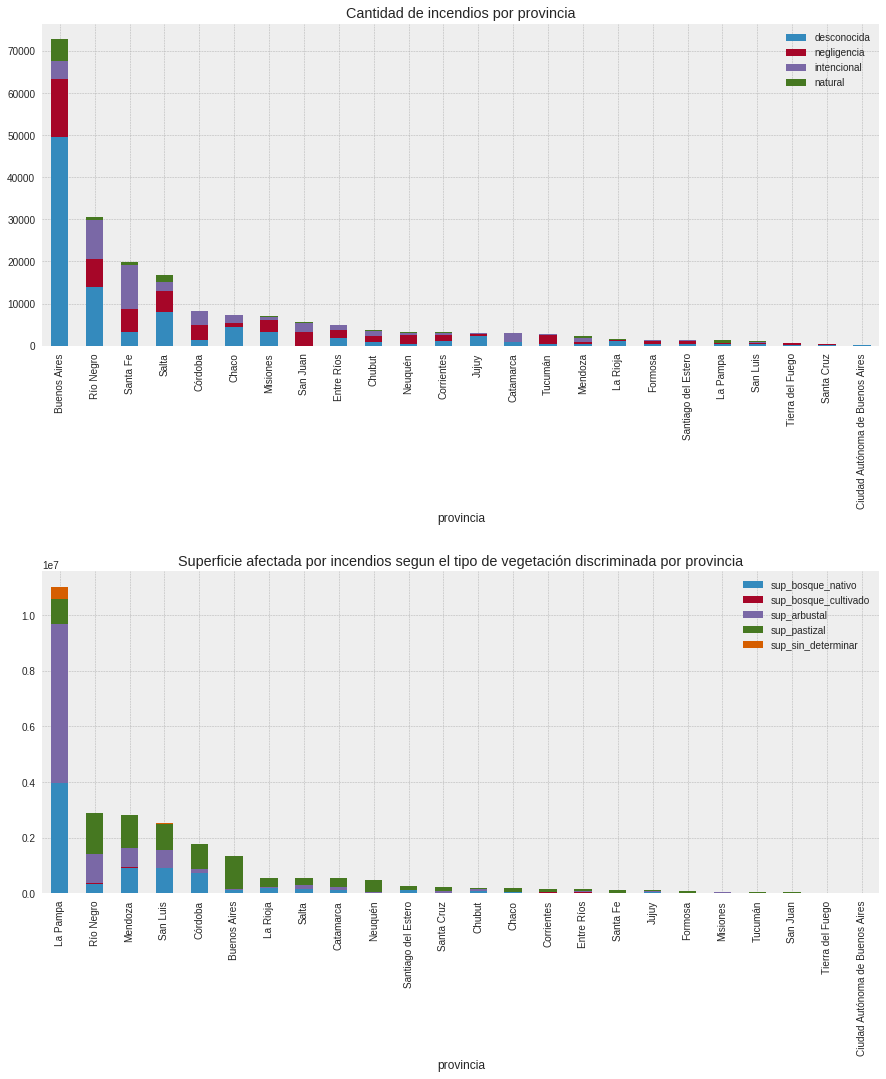

In [35]:
fig = plt.figure(figsize=(15,16))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


ax1.set_title('Cantidad de incendios por provincia')
df_provincia.sort_values('total', ascending=False).plot(y=['desconocida', 'negligencia', 'intencional', 'natural'],
        kind='bar', stacked=True, ax=ax1)

ax2.set_title('Superficie afectada por incendios segun el tipo de vegetación discriminada por provincia')
df_provincia.sort_values('sup_total', ascending=False).plot(y=['sup_bosque_nativo', 'sup_bosque_cultivado', 'sup_arbustal', 'sup_pastizal','sup_sin_determinar'],
        kind='bar', stacked=True, ax=ax2)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace= None, hspace=0.7)
plt.show()


En este gráfico se puede ver la distribución del total de incendios forestales por provincia, en los últimos 24 años. Claramente la provincia de Buenos Aires tiene muchos registros más que el resto. 

Algo que a priori podría considerarse importante para los incendios forestales es el clima de la provincia, pero al analizar este gráfico, esta influencia no es visible. Ya que provincias con clima húmedo, como Buenos Aires, Santa Fe y Misiones, que se esperarían menos incendios, se encuentran con una gran cantidad de registros. De esta aclaración puede decirse que la actividad agropecuaria puede tener mucha influencia en la cantidad de incendios forestales. 

Una observación que era esperable es el bajo número de incendios en la Ciudad Autónoma de Buenos Aires, siendo prácticamente nula la cantidad comparado con las otras provincas. 

Ademas se puede observar en el primer cuadrante al discriminar los incendios por su causa queda en evidencia lo que pasa en la provincia de Buenos Aires, en donde se registraron casi 50000 incendios forestales con causas desconocidas, siendo más del doble de los incendios registrados por otras causas. Al no observar este mismo comportamiento en el resto de las provincias se podría decir que hay una falencia en Buenos Aires para registrar la causa del incendio, y no que sea objetivamente dificil determinar la causa del incendio en más del 60% de los casos.

Luego si comparamos los dos cuadrantes vemos que la provincia de Río Negro tiende a correlacinar la cantidad de incendio con el área incendiada, mientras que en la provincia de Bueno Aires la cantidad de registro de incendios no correlaciona con las hectareas incendiadas. Siguiendo esta linea de analisis, en la provincia de La Pampa los registros en los 24 años han sido bajos en comparación con las otras provincias pero en cuanto a superficie incendiada supera notablemente a las de mas provincias, esta gran área de superficie incediada en La Pampa puede deberse a la planitud de la misma dando lugar a grandes rafagas de viento que aumente las zonas afectadas en el momento del incendio, lo que puede responder a por que tan bajos resgistros de incendios en con paración a la gran área incendiada. Otra alternativa a este hecho es la baja población de la provincia  en la zonas de los incendios.


La pregunta que surge es existe alguna correlación entre el número de hectareas incendiadas de algun tipo vegental con la provincia. Para testiar si estas variables son independientes se implementa el test de chi-cuadrado con H_{0} = El tipo de vegetación es independiente de la Provincia, con un grado de significancia del 0.5, encontramos:



In [49]:
import scipy as sp

obs = data_sup.drop(labels = ['anio','sup_total'], axis = 1)
obs = obs.groupby('provincia').sum()
display(obs.head(4))
display(obs.shape)
chi_cuadrado = sp.stats.chi2_contingency(obs)
print('test:', chi_cuadrado[0])
print('p-value:', chi_cuadrado[1])
print('grados de libertad:', chi_cuadrado[2])
print('Matriz de frecuencias esperadas:')
display(pd.DataFrame(data = chi_cuadrado[3]))


,sup_bosque_nativo,sup_bosque_cultivado,sup_arbustal,sup_pastizal,sup_sin_determinar
provincia,,,,,
Buenos Aires,102698,28484,41007,1183164,10
Catamarca,128951,6307,75535,339039,0
Chaco,37928,7926,5048,141620,0
Chubut,73966,3512,70464,45961,0


(24, 5)

test: 10838562.97350627
p-value: 0.0
grados de libertad: 92
Matriz de frecuencias esperadas:


,0,1,2,3,4
0,4.041687e+05,12794.357013,4.541660e+05,4.591817e+05,25052.161252
1,1.639597e+05,5190.304667,1.842422e+05,1.862769e+05,10162.945223
2,5.740998e+04,1817.369370,6.451184e+04,6.522429e+04,3558.524313
3,5.782180e+04,1830.405735,6.497459e+04,6.569216e+04,3584.050342
4,7.663730e+01,2.426029,8.611765e+01,8.706871e+01,4.750318
5,5.044583e+04,1596.912257,5.668619e+04,5.731222e+04,3126.855326
6,5.335348e+05,16889.569245,5.995353e+05,6.061564e+05,33070.846138
7,4.295893e+04,1359.907173,4.827313e+04,4.880625e+04,2662.784363
8,2.610260e+04,826.303541,2.933160e+04,2.965553e+04,1617.954661
9,3.115977e+04,986.393127,3.501436e+04,3.540105e+04,1931.420207


Usando [Wolfra Alpha](https://www.wolframalpha.com/input/?i=chi+squared+distribution+nu%3D92+alpha+%3D+0.05) para obtener el valor de tabla del chi-cuadrado con grado de libertad 92 y significacia 0.05, el cual resulta 115.39 que es mucho menor que nuestro chi-cuadrado se rechaza la hipotesis nula con un grado de confiaza del 95%

Este resultado era de esperar dado a que cada Provincia se caracteriza en un tipo de vegetación, y cada tipo de vegetación tiene un distinto nivel de suceptibilidad a la propagación del fuego. Por ejemplo la vegetación de tipo arbustal se caracteriza por tener baja altura estar rodeada por paztizal y ser leñosa en comparación a la vegetación que encontramos en un bosque (vegetación mayor a cuatro metros y rodeada por tierra)

A partir de la distribución de incendios forestales a lo largo de los años en cada provincia (figura anterior), se observan tres provincias que sobresalen que son Buenos Aires, Rio negro y Santa Fe. Por esta razón se decidió estudiar en cada una de estas provincias la correlación entre la variable *años* y las *causas*, para observar si existe alguna conexión entre los registros en cada porvincia para un dado año.

In [22]:
data_BA_cant = data.xs('Buenos Aires', level='provincia')[['negligencia', 'intencional', 'natural', 'desconocida']]
data_Buenos_Aires_sup = data.xs('Buenos Aires', level='provincia')[['sup_bosque_nativo', 'sup_bosque_cultivado', 'sup_arbustal', 'sup_pastizal', 'sup_sin_determinar']]

data_RN_cant = data.xs('Río Negro', level='provincia')[['negligencia', 'intencional', 'natural', 'desconocida']]
data_RN_sup = data.xs('Río Negro', level='provincia')[['sup_bosque_nativo', 'sup_bosque_cultivado', 'sup_arbustal', 'sup_pastizal', 'sup_sin_determinar']]

data_SF_cant = data.xs('Santa Fe', level='provincia')[['negligencia', 'intencional', 'natural', 'desconocida']]
data_SF_sup = data.xs('Santa Fe', level='provincia')[['sup_bosque_nativo', 'sup_bosque_cultivado', 'sup_arbustal', 'sup_pastizal', 'sup_sin_determinar']]


Probabilidad_conjunta_anio_causa_BA  = data_BA_cant/data_BA_cant.sum().sum()
print('\n Probabilidad marginal de las causas de incendio para la provincia de Buenos Aires:')
display(Probabilidad_conjunta_anio_causa_BA.sum(axis = 0).to_frame())

Probabilidad_conjunta_anio_causa_RN = data_RN_cant/data_RN_cant.sum().sum()
print('\n Probabilidad marginal de las causas de incendio para la provincia de Rio Negro:')
display(Probabilidad_conjunta_anio_causa_RN.sum(axis = 0).to_frame())

Probabilidad_conjunta_anio_causa_SF = data_SF_cant/data_SF_cant.sum().sum()
print('\n Probabilidad marginal de las causas de incendio para la provincia de Santa Fe:')
display(Probabilidad_conjunta_anio_causa_SF.sum(axis = 0).to_frame())


 Probabilidad marginal de las causas de incendio para la provincia de Buenos Aires:


,0
negligencia,0.189877
intencional,0.060020
natural,0.071472
desconocida,0.678631



 Probabilidad marginal de las causas de incendio para la provincia de Rio Negro:


,0
negligencia,0.223539
intencional,0.303110
natural,0.017733
desconocida,0.455617



 Probabilidad marginal de las causas de incendio para la provincia de Santa Fe:


,0
negligencia,0.279940
intencional,0.519910
natural,0.040422
desconocida,0.159729


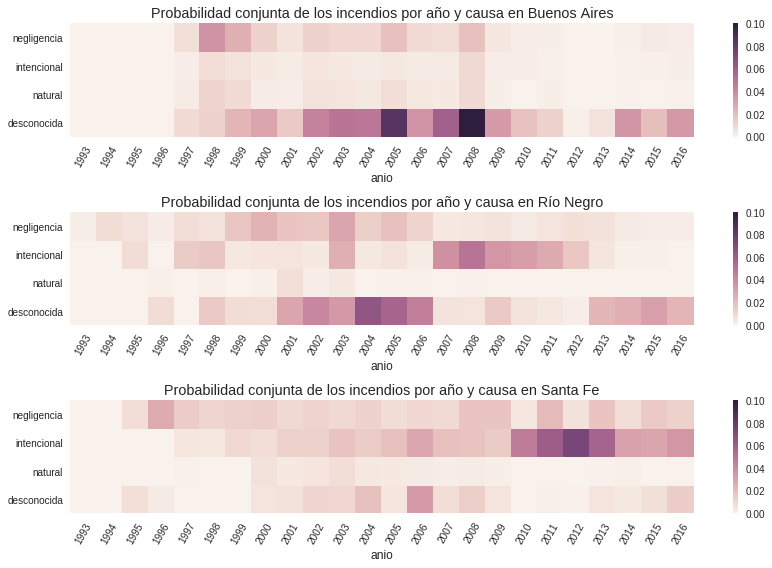

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
sns.heatmap(Probabilidad_conjunta_anio_causa_BA.transpose(), linewidths=0, vmin=0, vmax=0.1, ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 60)
ax1.set_title('Probabilidad conjunta de los incendios por año y causa en Buenos Aires')
sns.heatmap(Probabilidad_conjunta_anio_causa_RN.transpose(), linewidths=0, vmin=0, vmax=0.1, ax = ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 60)
ax2.set_title('Probabilidad conjunta de los incendios por año y causa en Río Negro')
sns.heatmap(Probabilidad_conjunta_anio_causa_SF.transpose(), linewidths=0, vmin=0, vmax=0.1, ax = ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 60)
ax3.set_title('Probabilidad conjunta de los incendios por año y causa en Santa Fe')
plt.tight_layout()
plt.show()

Podemos observar que tanto en la provincia de Buenos Aires como en la de Río Negro los incendios forestales con mayor frecuencia a lo largo de los años son de causa desconocida (concentrandose en el 2005 y 2009 en Buenos Aires, y en el 2004 y 2005 en Rio Negro), mientras que en la provincia de de Santa Fe el registro a lo largo de los años muestra que los incendios con mayor frecuencia registrados son del tipo intencionales (principalmente en los años entre el 2010 y 2013), lo cual puede atribuirse a que Santa Fe es una provincia que se caracteriza por tener una importante área agrícola.

Por otro lado en las tres provincias notamos que el número de registros de incendios naturales es bajo, y por el origen de éstos, creemos que a lo largo de los años no ha habido un impacto fuerte en épocas de sequias, tormentas electricas o altas temperaturas en estas zonas del pais.



